In [1]:
cd /content/drive/MyDrive/ml_pjct1

/content/drive/MyDrive/ml_pjct1


In [2]:
!ls
import cv2
from PIL import Image
import numpy as np 
import copy
from google.colab.patches import cv2_imshow

a_exsrc10.png  a_exsrc9.png	   Car_Detection.ipynb	   Ppl_Blurred
a_exsrc11.png  a_FINAL_RESULT.png  Contour_candidates.png  Ppl_cropImg
a_exsrc1.png   b_ppl1.jpeg	   contouring.png	   Ppl_face
a_exsrc2.png   b_ppl2.png	   final_res.png	   Ppl_faceBlurred
a_exsrc3.png   b_ppl3.png	   grayscaled_plate.png    Preprocess.png
a_exsrc4.png   b_ppl4.png	   ML_BLURcar.ipynb	   Rotated.png
a_exsrc5.png   b_ppl5.png	   ML_BLURimg.ipynb	   Start.png
a_exsrc6.png   b_ppl6.png	   msc.png
a_exsrc7.png   Car_Blurred	   Plate_Contour.png
a_exsrc8.png   Car_cropImg	   Possible_contours.png


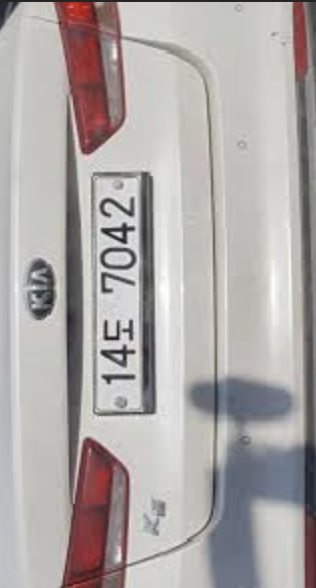

In [5]:
img = cv2.imread('a_exsrc11.png')
image = img.copy()
# image = image.resize((450,250))
image_arr = np.array(image)
cv2_imshow(image)

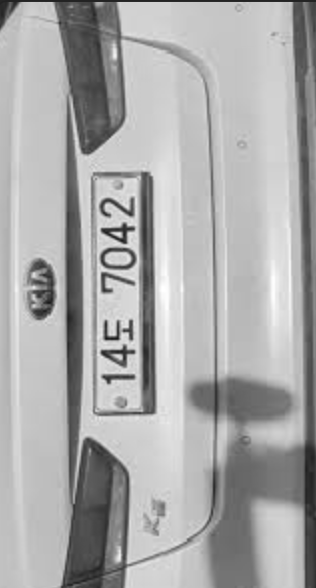

In [6]:
grey = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
Image.fromarray(grey)

In [ ]:
blur = cv2.GaussianBlur(grey,(5,5),0)
Image.fromarray(blur)
dilated = cv2.dilate(blur,np.ones((3,3)))
Image.fromarray(dilated)

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
closing = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel) 
Image.fromarray(closing)

In [ ]:
car_cascade_src = 'cars.xml'
car_cascade = cv2.CascadeClassifier(car_cascade_src)
cars = car_cascade.detectMultiScale(closing, 1.1, 1)
print(cars)

In [ ]:
cnt = 0
for (x,y,w,h) in cars:
  cv2.rectangle(image_arr,(x,y),(x+w,y+h),(255,0,0),2)
  cnt += 1
print(cnt, " cars found")
Image.fromarray(image_arr)